# 트랜스폼 정의 & 샘플 시각화

In [1]:
import os

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 노트북이 위치한 디렉토리에서 프로젝트 루트 디렉토리로 이동
# 'notebooks/EDA' 에서 'AI_Lab/computer-vision-competition-1SEN' 으로 이동
os.chdir("../../") 

# 작업 디렉토리 변경 후 다시 확인
print("변경 후 작업 디렉토리:", os.getcwd())

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN/notebooks/EDA
변경 후 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN


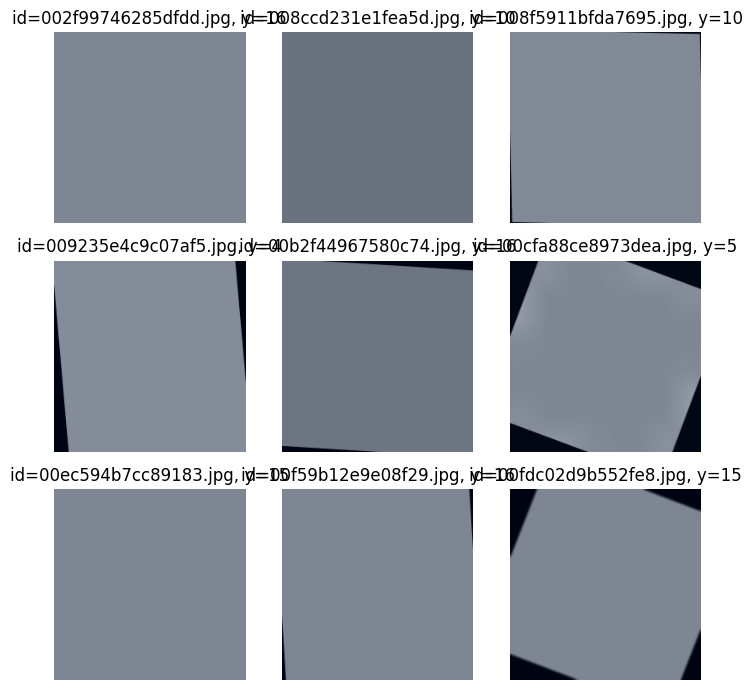

In [2]:
import pandas as pd, matplotlib.pyplot as plt                               # 데이터프레임 처리, 시각화 도구
import json                                                                 # JSON 파일 처리
from src.data.transforms import get_train_transforms, get_val_transforms    # 학습/검증용 변환 함수
from src.data.dataset import DocTypeDataset                                 # 커스텀 데이터셋 클래스

CFG = json.load(open("configs/data_config.json"))                   # 데이터 설정 파일 로드
train_csv = CFG["paths"]["train_csv"]                               # 학습 CSV 경로
img_root  = CFG["paths"]["train_root"]                              # 이미지 루트 경로
tr = get_train_transforms(CFG["loader"]["img_size"], CFG["augs"])   # 학습용 변환 생성
va = get_val_transforms(CFG["loader"]["img_size"])                  # 검증용 변환 생성

# 학습용 데이터셋 인스턴스
ds = DocTypeDataset(train_csv, img_root,
                    mode="train",
                    transform=tr,
                    return_id=True)

# 3x3 서브플롯 생성 (총 9개 이미지)
fig, axes = plt.subplots(3,3, figsize=(7,7))

# 첫 9개 샘플 시각화 루프
for ax, i in zip(axes.ravel(), range(9)):
    x, y, _id = ds[i]                                # 데이터셋에서 i번째 샘플 추출
    ax.imshow(x.permute(1,2,0).numpy()*0.229+0.485)  # rough unnorm view: 텐서 → 이미지
    ax.set_title(f"id={_id}, y={y}")                 # 이미지 제목(ID, 라벨)
    ax.axis("off")                                   # 축 제거

plt.tight_layout()                                   # 서브플롯 간격 자동 조정
plt.show()                                           # 최종 플롯 출력
